In [98]:
import os
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import tensorflow as tf
from scipy.misc import imresize

In [4]:
print os.listdir('flags')

['us', 'italy', 'canada']


In [32]:
ca_loc = os.path.join('flags', 'canada')
ca_img = [os.path.join(ca_loc, file_i)
       for file_i in os.listdir(ca_loc)
       if '.jpg' in file_i]
it_loc = os.path.join('flags', 'italy')
it_img = [os.path.join(it_loc, file_i)
       for file_i in os.listdir(it_loc)
       if '.jpg' in file_i]
us_loc = os.path.join('flags', 'us')
us_img = [os.path.join(us_loc, file_i)
       for file_i in os.listdir(us_loc)
       if '.jpg' in file_i]


(137, 368, 3)


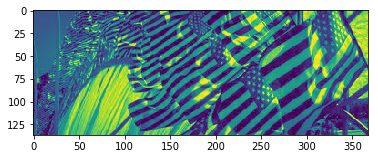

In [39]:
sample_img = plt.imread(us_img[0])
print sample_img.shape
plt.imshow(sample_img[:,:,2])

In [82]:
def resize_img(img):
    if img.shape[0] > img.shape[1]:
        extra = (img.shape[0] - img.shape[1])
        if extra % 2 == 0:
            crop = img[extra // 2:-extra // 2, :]
        else:
            crop = img[max(0, extra // 2 + 1):min(-1, -(extra // 2)), :]
    elif img.shape[1] > img.shape[0]:
        extra = (img.shape[1] - img.shape[0])
        if extra % 2 == 0:
            crop = img[:, extra // 2:-extra // 2]
        else:
            crop = img[:, max(0, extra // 2 + 1):min(-1, -(extra // 2))]
    else:
        crop = img
    return crop

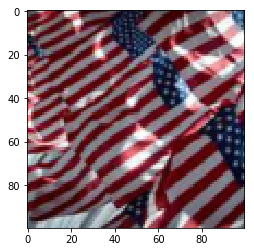

In [83]:
plt.imshow(imresize(resize_img(sample_img),(100,100)))

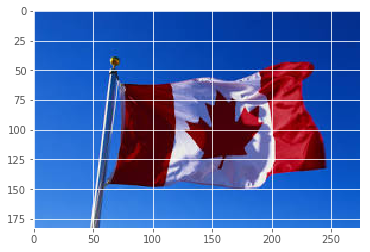

In [158]:
ca_resized = []
read = plt.imread(ca_img[5])
plt.imshow(read)
for imgs in ca_img:
    imrd = plt.imread(imgs)
    if imrd.shape[2]>3:
        imrd = imrd[:,:,:3]
    rszd = resize_img(imrd)
    low_res = imresize(rszd,(60,60))
    ca_resized.append(low_res)
    
us_resized=[]
for imgs in us_img:
    imrd = plt.imread(imgs)
    if imrd.shape[2]>3:
        imrd = imrd[:,:,:3]
    rszd = resize_img(imrd)
    low_res = imresize(rszd,(60,60))
    us_resized.append(low_res)
    
it_resized=[]
for imgs in it_img:
    imrd = plt.imread(imgs)
    if imrd.shape[2]>3:
        imrd = imrd[:,:,:3]
    rszd = resize_img(imrd)
    low_res = imresize(rszd,(60,60))
    it_resized.append(low_res)

(60, 60, 3)


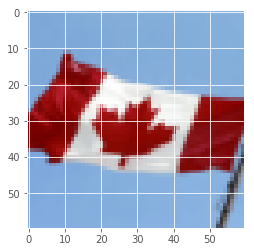

In [160]:
ca_data = np.array(ca_resized)
us_data = np.array(us_resized)
it_data = np.array(it_resized)

In [161]:
ca_mean = np.mean(ca_data, axis=0)
us_mean = np.mean(us_data, axis=0)
it_mean = np.mean(it_data, axis=0)

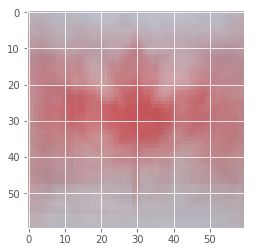

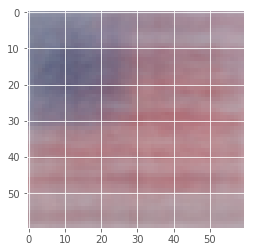

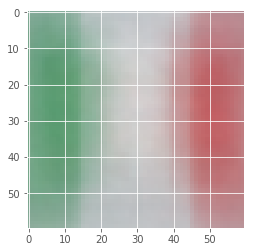

In [163]:
plt.style.use("ggplot")
plt.figure()
plt.imshow (ca_mean.astype(np.uint8))

plt.figure()
plt.imshow (us_mean.astype(np.uint8))

plt.figure()
plt.imshow (it_mean.astype(np.uint8))

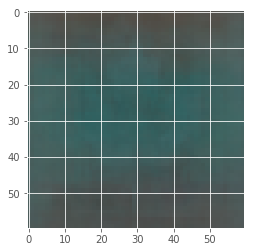

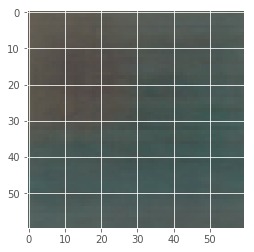

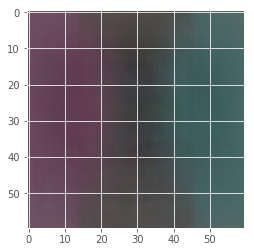

In [164]:
plt.imshow(np.std(ca_data, axis=0).astype(np.uint8))
plt.figure()
plt.imshow(np.std(us_data, axis=0).astype(np.uint8))
plt.figure()
plt.imshow(np.std(it_data, axis=0).astype(np.uint8))


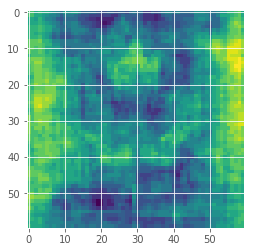

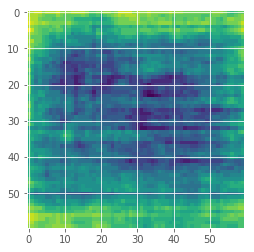

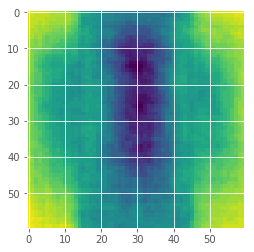

In [165]:
plt.imshow(np.mean(np.std(ca_data, axis=0),axis=2).astype(np.uint8))
plt.figure()
plt.imshow(np.mean(np.std(us_data, axis=0),axis=2).astype(np.uint8))
plt.figure()
plt.imshow(np.mean(np.std(it_data, axis=0),axis=2).astype(np.uint8))
plt.figure()
